In [ ]:
#Import dependencies
import os
import pandas as pd

spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
# Create a SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read in csv into pandas
players_df = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/Project-4/Resources/CollegeBasketballPlayers2009-2021.csv'))

# display the DataFrame
players_df

<ipython-input-4-4c52abb59c2b>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/Project-4/Resources/CollegeBasketballPlayers2009-2021.csv'))


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [ ]:
#Dropping columns that have too many null values
cleaned_players_df = players_df.drop(columns=["num", "Rec Rank", "ast/tov", "rimmade", "rimmade+rimmiss", "midmade", "midmade+midmiss", "rimmade/(rimmade+rimmiss)",
                                               "midmade/(midmade+midmiss)", "dunksmade", "dunksmiss+dunksmade", "dunksmade/(dunksmade+dunksmiss)"])
cleaned_players_df

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [ ]:
#Creating a column called drafted with a 0(undrafted) and a 1(drafted)
cleaned_players_df["drafted"] = ""
results = []
for index, row in cleaned_players_df.iterrows():
  if(row["pick"] >= 1):
    results.append(1)
  else:
    results.append(0)

cleaned_players_df["drafted"] = results
cleaned_players_df

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,drafted
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000,0
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000,0
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0


In [ ]:
#Checking to make sure that there are 1435 1's in the drafted column
count = 0
for value in cleaned_players_df["drafted"]:
  if(value == 1):
    count = count + 1

print(count)

1435


In [ ]:
#Dropping the pick value
cleaned_players_df = cleaned_players_df.drop(columns=["pick", "Unnamed: 64", "Unnamed: 65"])
cleaned_players_df

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,0
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [ ]:
#Dropping null values
cleaned_players_df = cleaned_players_df.dropna()

In [ ]:
#Checking to make sure that there are 1435 1's in the drafted column
count = 0
for value in cleaned_players_df["drafted"]:
  if(value == 1):
    count = count + 1

print(count)

1435


In [ ]:
#Exporting the cleaned df to csv
cleaned_players_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Project-4/Resources/Cleaned_df.csv', index=False)

In [ ]:
#Checking that the csv loads correctly
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project-4/Resources/Cleaned_df.csv')
df

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60701,Abiram Frye,New Orleans,Slnd,1,0.2,0.0,0.0,0.0,0.00,0.0,...,-6.791950,1.201100,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0
60702,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,0.0,...,-14.203200,-6.921100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
60703,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,0
60704,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0


In [ ]:
#Checking the data types of each column
df.dtypes

player_name     object
team            object
conf            object
GP               int64
Min_per        float64
Ortg           float64
usg            float64
eFG            float64
TS_per         float64
ORB_per        float64
DRB_per        float64
AST_per        float64
TO_per         float64
FTM              int64
FTA              int64
FT_per         float64
twoPM            int64
twoPA            int64
twoP_per       float64
TPM              int64
TPA              int64
TP_per         float64
blk_per        float64
stl_per        float64
ftr            float64
yr              object
ht              object
porpag         float64
adjoe          float64
pfr            float64
year             int64
pid              int64
type            object
drtg           float64
adrtg          float64
dporpag        float64
stops          float64
bpm            float64
obpm           float64
dbpm           float64
gbpm           float64
mp             float64
ogbpm          float64
dgbpm      

In [ ]:
#Reading csv into spark
basketball_data = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Project-4/Resources/Cleaned_df.csv',inferSchema=True, header=True)
basketball_data.show()

+---------------+------------------+----+---+-------+-----+----+----+------+-------+-------+-------+------+---+---+------+-----+-----+--------+---+---+------+-------+-------+-----+---+------+---------+--------+---+----+---+----+-------+-------+---------+--------+---------+---------+----------+---------+-------+----------+---------+------+------+------+------+------+------+-------+-------+
|    player_name|              team|conf| GP|Min_per| Ortg| usg| eFG|TS_per|ORB_per|DRB_per|AST_per|TO_per|FTM|FTA|FT_per|twoPM|twoPA|twoP_per|TPM|TPA|TP_per|blk_per|stl_per|  ftr| yr|    ht|   porpag|   adjoe|pfr|year|pid|type|   drtg|  adrtg|  dporpag|   stops|      bpm|     obpm|      dbpm|     gbpm|     mp|     ogbpm|    dgbpm|  oreb|  dreb|  treb|   ast|   stl|   blk|    pts|drafted|
+---------------+------------------+----+---+-------+-----+----+----+------+-------+-------+-------+------+---+---+------+-----+-----+--------+---+---+------+-------+-------+-----+---+------+---------+--------+---+--

In [ ]:
#Creating a temporary view
basketball_data.createOrReplaceTempView('players')


**Model 1**
<br>
<br>
<br>
<br>
**information in readme**

In [ ]:
#Query to get data for the model
query = """
SELECT conf, GP, mp, pts, Ortg, usg, TS_per, FTM, FTA, twoPA, twoPM, TPM, TPA, drtg, bpm, oreb, dreb, ast, stl, blk, drafted
FROM players
"""
results = spark.sql(query)
results.show()

+----+---+-------+-------+-----+----+------+---+---+-----+-----+---+---+-------+---------+------+------+------+------+------+-------+
|conf| GP|     mp|    pts| Ortg| usg|TS_per|FTM|FTA|twoPA|twoPM|TPM|TPA|   drtg|      bpm|  oreb|  dreb|   ast|   stl|   blk|drafted|
+----+---+-------+-------+-----+----+------+---+---+-----+-----+---+---+-------+---------+------+------+------+------+------+-------+
|  SB| 26|14.5769| 3.8846| 97.3|16.6| 44.43| 10| 14|   68|   26| 13| 39|108.321| -4.99514|0.1923|0.6154|1.1923|0.3462|0.0385|      0|
| WAC| 34|24.5294| 5.9412|108.3|14.9| 54.48| 30| 45|  113|   56| 20| 51|105.078| 0.593024|0.6765|1.2647|1.8235|0.4118|0.2353|      0|
|  BE| 27|33.1852|12.1852| 96.2|21.8| 47.98| 45| 67|  157|   67| 50|154|107.556|0.0031609|0.6296|2.3333| 1.963|0.4815|   0.0|      0|
| WCC| 30|17.9667| 4.9333| 97.7|16.0| 53.69| 14| 27|   63|   25| 28| 62|108.858|-0.977798|   0.7|1.4333|   1.1|0.5667|0.1333|      0|
|  BW| 33|22.9091| 7.5758| 96.5|22.0| 54.31| 64|114|  176|   9

In [ ]:
#Converting spark query to pandas dataframe
df1 = results.toPandas()
df1.head()

,conf,GP,mp,pts,Ortg,usg,TS_per,FTM,FTA,twoPA,...,TPM,TPA,drtg,bpm,oreb,dreb,ast,stl,blk,drafted
0,SB,26,14.5769,3.8846,97.3,16.6,44.43,10,14,68,...,13,39,108.321,-4.995140,0.1923,0.6154,1.1923,0.3462,0.0385,0
1,WAC,34,24.5294,5.9412,108.3,14.9,54.48,30,45,113,...,20,51,105.078,0.593024,0.6765,1.2647,1.8235,0.4118,0.2353,0
2,BE,27,33.1852,12.1852,96.2,21.8,47.98,45,67,157,...,50,154,107.556,0.003161,0.6296,2.3333,1.9630,0.4815,0.0000,0
3,WCC,30,17.9667,4.9333,97.7,16.0,53.69,14,27,63,...,28,62,108.858,-0.977798,0.7000,1.4333,1.1000,0.5667,0.1333,0
4,BW,33,22.9091,7.5758,96.5,22.0,54.31,64,114,176,...,0,0,101.052,-1.836060,1.4242,3.3030,0.8485,0.4545,0.3333,0


In [ ]:
#Importing whats needed for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df1, dtype=int)
dummies.head()

,GP,mp,pts,Ortg,usg,TS_per,FTM,FTA,twoPA,twoPM,...,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,conf_ind
0,26,14.5769,3.8846,97.3,16.6,44.43,10,14,68,26,...,0,1,0,0,0,0,0,0,0,0
1,34,24.5294,5.9412,108.3,14.9,54.48,30,45,113,56,...,0,0,0,0,0,0,0,1,0,0
2,27,33.1852,12.1852,96.2,21.8,47.98,45,67,157,67,...,0,0,0,0,0,0,0,0,0,0
3,30,17.9667,4.9333,97.7,16.0,53.69,14,27,63,25,...,0,0,0,0,0,0,0,0,1,0
4,33,22.9091,7.5758,96.5,22.0,54.31,64,114,176,93,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = dummies["drafted"]
X = dummies.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                672       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 757 (2.96 KB)
Trainable params: 757 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1423/1423 [==============================] - 5s 3ms/step - loss: 0.1155 - accuracy: 0.9725
Epoch 2/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9770
Epoch 3/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.0633 - accuracy: 0.9779
Epoch 4/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.0618 - accuracy: 0.9788
Epoch 5/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.0610 - accuracy: 0.9792
Epoch 6/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9794
Epoch 7/10
1423/1423 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9794
Epoch 8/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.0593 - accuracy: 0.9797
Epoch 9/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.0586 - accuracy: 0.9796
Epoch 10/10
1423/1423 [==============================] - 2s 2ms/step - loss: 0.058

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

475/475 - 1s - loss: 0.0611 - accuracy: 0.9780 - 992ms/epoch - 2ms/step
Loss: 0.06113104522228241, Accuracy: 0.9779930114746094


In [ ]:
predictions = nn.predict(X_test)
from sklearn.metrics import classification_report
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

475/475 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Undrafted       0.98      0.99      0.98     14818
     Drafted       0.29      0.18      0.22       359

    accuracy                           0.97     15177
   macro avg       0.63      0.58      0.60     15177
weighted avg       0.96      0.97      0.97     15177



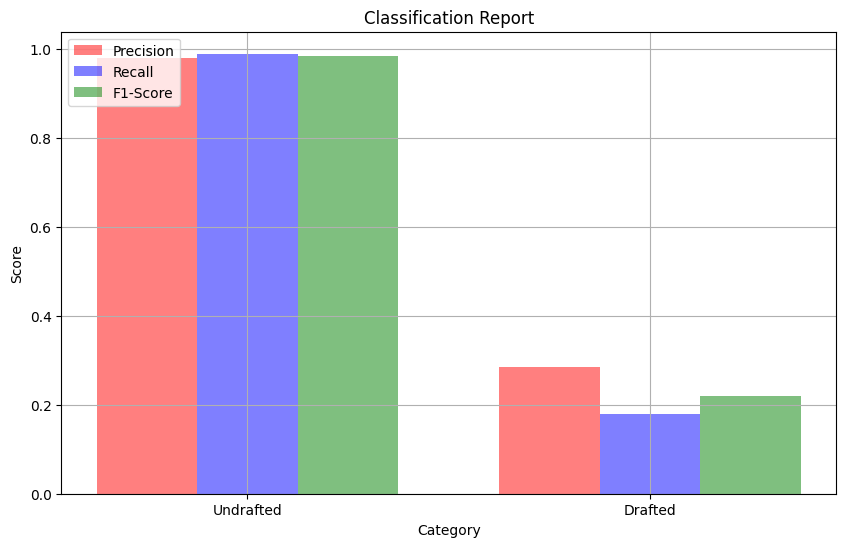

In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'], loc='upper left')
plt.grid()
plt.show()

**Model 2**
<br>
<br>
<br>
<br>
**information in readme**

In [ ]:
#Query to get data for the model
query2 = """
SELECT GP, mp, pts, Ortg, usg, TS_per, FTM, twoPM, TPM, drtg, bpm, oreb, dreb, ast, stl, blk, drafted
FROM players
"""
results2 = spark.sql(query2)
results2.show()

+---+-------+-------+-----+----+------+---+-----+---+-------+---------+------+------+------+------+------+-------+
| GP|     mp|    pts| Ortg| usg|TS_per|FTM|twoPM|TPM|   drtg|      bpm|  oreb|  dreb|   ast|   stl|   blk|drafted|
+---+-------+-------+-----+----+------+---+-----+---+-------+---------+------+------+------+------+------+-------+
| 26|14.5769| 3.8846| 97.3|16.6| 44.43| 10|   26| 13|108.321| -4.99514|0.1923|0.6154|1.1923|0.3462|0.0385|      0|
| 34|24.5294| 5.9412|108.3|14.9| 54.48| 30|   56| 20|105.078| 0.593024|0.6765|1.2647|1.8235|0.4118|0.2353|      0|
| 27|33.1852|12.1852| 96.2|21.8| 47.98| 45|   67| 50|107.556|0.0031609|0.6296|2.3333| 1.963|0.4815|   0.0|      0|
| 30|17.9667| 4.9333| 97.7|16.0| 53.69| 14|   25| 28|108.858|-0.977798|   0.7|1.4333|   1.1|0.5667|0.1333|      0|
| 33|22.9091| 7.5758| 96.5|22.0| 54.31| 64|   93|  0|101.052| -1.83606|1.4242| 3.303|0.8485|0.4545|0.3333|      0|
|  6|    1.5|    0.0|  0.0| 0.0|   0.0|  0|    0|  0|92.7329| -2.93202|   0.0|0.

In [ ]:
#Converting spark query to pandas dataframe
df2 = results2.toPandas()
df2.head()

,GP,mp,pts,Ortg,usg,TS_per,FTM,twoPM,TPM,drtg,bpm,oreb,dreb,ast,stl,blk,drafted
0,26,14.5769,3.8846,97.3,16.6,44.43,10,26,13,108.321,-4.995140,0.1923,0.6154,1.1923,0.3462,0.0385,0
1,34,24.5294,5.9412,108.3,14.9,54.48,30,56,20,105.078,0.593024,0.6765,1.2647,1.8235,0.4118,0.2353,0
2,27,33.1852,12.1852,96.2,21.8,47.98,45,67,50,107.556,0.003161,0.6296,2.3333,1.9630,0.4815,0.0000,0
3,30,17.9667,4.9333,97.7,16.0,53.69,14,25,28,108.858,-0.977798,0.7000,1.4333,1.1000,0.5667,0.1333,0
4,33,22.9091,7.5758,96.5,22.0,54.31,64,93,0,101.052,-1.836060,1.4242,3.3030,0.8485,0.4545,0.3333,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = df2["drafted"]
X = df2.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 16

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="sigmoid"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                340       
                                                                 
 dense_4 (Dense)             (None, 18)                378       
                                                                 
 dense_5 (Dense)             (None, 16)                304       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1039 (4.06 KB)
Trainable params: 1039 (4.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model

nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.1087 - accuracy: 0.9764
Epoch 2/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9764
Epoch 3/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0713 - accuracy: 0.9765
Epoch 4/10
1423/1423 [==============================] - 4s 3ms/step - loss: 0.0700 - accuracy: 0.9771
Epoch 5/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9778
Epoch 6/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0684 - accuracy: 0.9779
Epoch 7/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.9783
Epoch 8/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9785
Epoch 9/10
1423/1423 [==============================] - 4s 3ms/step - loss: 0.0669 - accuracy: 0.9785
Epoch 10/10
1423/1423 [==============================] - 3s 2ms/step - loss: 0.066

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

475/475 - 1s - loss: 0.0668 - accuracy: 0.9778 - 763ms/epoch - 2ms/step
Loss: 0.06676021963357925, Accuracy: 0.9777953624725342


In [ ]:
# Creating a classification report
predictions = nn2.predict(X_test)
from sklearn.metrics import classification_report
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

475/475 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

   Undrafted       0.98      1.00      0.99     14818
     Drafted       0.00      0.00      0.00       359

    accuracy                           0.98     15177
   macro avg       0.49      0.50      0.49     15177
weighted avg       0.95      0.98      0.96     15177



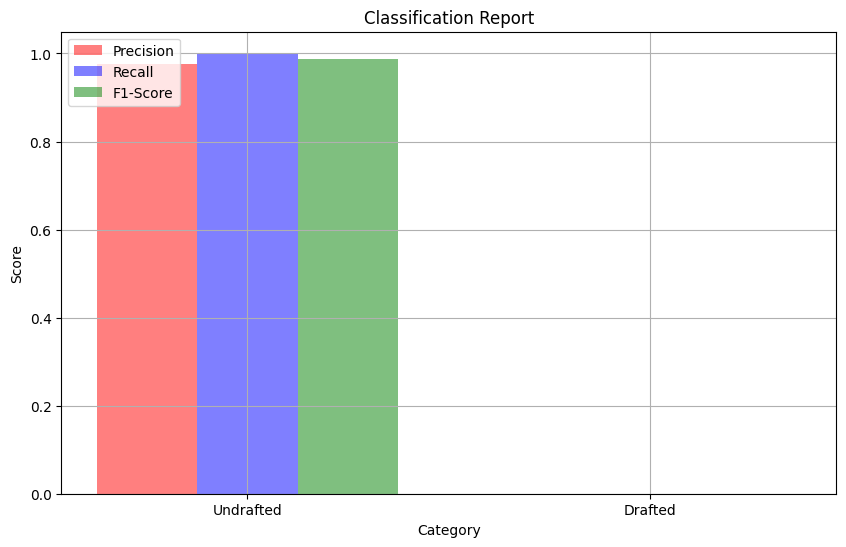

In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'], loc='upper left')
plt.grid()
plt.show()

**Model 3**
<br>
<br>
<br>
<br>
**information in readme**

In [ ]:
#Query to get data for the model
query3 = """
SELECT conf, team, GP, mp, pts, Ortg, usg, TS_per, FTM, eFG, stops, FTA, twoPA, twoPM, TPM, TPA, drtg, bpm, oreb, dreb, treb, AST_per, TO_per, ast, stl, blk, Min_per, FT_per, twoP_per, ORB_per, DRB_per, blk_per, TP_per, yr, drafted
FROM players
"""
results3 = spark.sql(query3)
results3.show()

+----+------------------+---+-------+-------+-----+----+------+---+----+--------+---+-----+-----+---+---+-------+---------+------+------+------+-------+------+------+------+------+-------+------+--------+-------+-------+-------+------+---+-------+
|conf|              team| GP|     mp|    pts| Ortg| usg|TS_per|FTM| eFG|   stops|FTA|twoPA|twoPM|TPM|TPA|   drtg|      bpm|  oreb|  dreb|  treb|AST_per|TO_per|   ast|   stl|   blk|Min_per|FT_per|twoP_per|ORB_per|DRB_per|blk_per|TP_per| yr|drafted|
+----+------------------+---+-------+-------+-----+----+------+---+----+--------+---+-----+-----+---+---+-------+---------+------+------+------+-------+------+------+------+------+-------+------+--------+-------+-------+-------+------+---+-------+
|  SB|     South Alabama| 26|14.5769| 3.8846| 97.3|16.6| 44.43| 10|42.5| 49.9644| 14|   68|   26| 13| 39|108.321| -4.99514|0.1923|0.6154|0.8077|   15.8|  16.3|1.1923|0.3462|0.0385|   29.5| 0.714|   0.382|    1.6|    4.6|    0.3| 0.333| So|      0|
| WAC|  

In [ ]:
#Converting spark query to pandas dataframe
df3 = results3.toPandas()
df3.head()

,conf,team,GP,mp,pts,Ortg,usg,TS_per,FTM,eFG,...,blk,Min_per,FT_per,twoP_per,ORB_per,DRB_per,blk_per,TP_per,yr,drafted
0,SB,South Alabama,26,14.5769,3.8846,97.3,16.6,44.43,10,42.5,...,0.0385,29.5,0.714,0.382,1.6,4.6,0.3,0.333,So,0
1,WAC,Utah St.,34,24.5294,5.9412,108.3,14.9,54.48,30,52.4,...,0.2353,60.9,0.667,0.496,3.8,6.3,1.0,0.392,So,0
2,BE,South Florida,27,33.1852,12.1852,96.2,21.8,47.98,45,45.7,...,0.0000,72.0,0.672,0.427,2.1,8.0,0.0,0.325,Sr,0
3,WCC,Pepperdine,30,17.9667,4.9333,97.7,16.0,53.69,14,53.6,...,0.1333,44.5,0.519,0.397,4.1,9.4,0.8,0.452,Sr,0
4,BW,Pacific,33,22.9091,7.5758,96.5,22.0,54.31,64,52.8,...,0.3333,56.2,0.561,0.528,8.3,18.6,1.9,0.000,Sr,0


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies3 = pd.get_dummies(df3, dtype=int)
dummies3.head()

,GP,mp,pts,Ortg,usg,TS_per,FTM,eFG,stops,FTA,...,team_Xavier,team_Yale,team_Youngstown St.,yr_0,yr_42.9,yr_57.1,yr_Fr,yr_Jr,yr_So,yr_Sr
0,26,14.5769,3.8846,97.3,16.6,44.43,10,42.5,49.9644,14,...,0,0,0,0,0,0,0,0,1,0
1,34,24.5294,5.9412,108.3,14.9,54.48,30,52.4,111.9290,45,...,0,0,0,0,0,0,0,0,1,0
2,27,33.1852,12.1852,96.2,21.8,47.98,45,45.7,115.0210,67,...,0,0,0,0,0,0,0,0,0,1
3,30,17.9667,4.9333,97.7,16.0,53.69,14,53.6,84.1698,27,...,0,0,0,0,0,0,0,0,0,1
4,33,22.9091,7.5758,96.5,22.0,54.31,64,52.8,128.0280,114,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Split our preprocessed data into our features and target arrays
y = dummies3["drafted"]
X = dummies3.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 85
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 75

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="tanh"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.utils import class_weight
# Calculate the weights for each class so that we can balance the data
class_weights = {0: .5, 1: 30}



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 90)                39330     
                                                                 
 dense_8 (Dense)             (None, 85)                7735      
                                                                 
 dense_9 (Dense)             (None, 80)                6880      
                                                                 
 dense_10 (Dense)            (None, 75)                6075      
                                                                 
 dense_11 (Dense)            (None, 1)                 76        
                                                                 
Total params: 60096 (234.75 KB)
Trainable params: 60096 (234.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, epochs=100, class_weight=class_weights)

Epoch 1/100
1423/1423 [==============================] - 7s 4ms/step - loss: 0.3394 - accuracy: 0.8204
Epoch 2/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.2331 - accuracy: 0.8742
Epoch 3/100
1423/1423 [==============================] - 4s 2ms/step - loss: 0.2115 - accuracy: 0.8848
Epoch 4/100
1423/1423 [==============================] - 5s 3ms/step - loss: 0.1866 - accuracy: 0.8918
Epoch 5/100
1423/1423 [==============================] - 4s 3ms/step - loss: 0.1783 - accuracy: 0.8966
Epoch 6/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.1658 - accuracy: 0.9092
Epoch 7/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.1550 - accuracy: 0.9173
Epoch 8/100
1423/1423 [==============================] - 5s 3ms/step - loss: 0.1490 - accuracy: 0.9247
Epoch 9/100
1423/1423 [==============================] - 4s 3ms/step - loss: 0.1383 - accuracy: 0.9292
Epoch 10/100
1423/1423 [==============================] - 3s 2ms/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

475/475 - 1s - loss: 0.1774 - accuracy: 0.9655 - 852ms/epoch - 2ms/step
Loss: 0.1773611456155777, Accuracy: 0.9654740691184998


In [ ]:
predictions = nn3.predict(X_test_scaled)
from sklearn.metrics import classification_report
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report3 = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

475/475 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Undrafted       0.99      0.97      0.98     14818
     Drafted       0.37      0.68      0.48       359

    accuracy                           0.97     15177
   macro avg       0.68      0.83      0.73     15177
weighted avg       0.98      0.97      0.97     15177



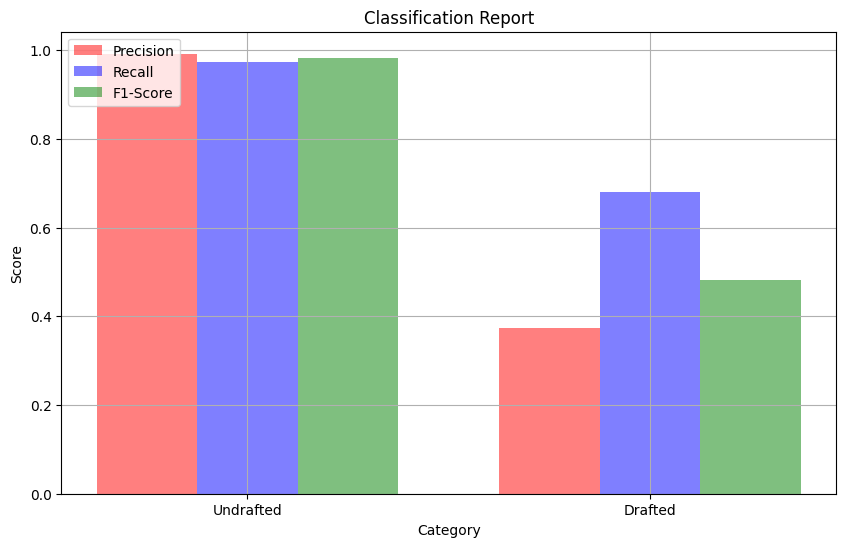

In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report3.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report3[category]['precision'] for category in categories]
recall = [report3[category]['recall'] for category in categories]
f1_score = [report3[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score'], loc='upper left')
plt.grid()
plt.show()

**Model 4**
<br>
<br>
<br>
<br>
**information in readme**

In [ ]:
#Query to get data for the model
query = """
SELECT GP, mp, pts, Ortg, usg, TS_per, FTM, twoPM, TPM, drtg, bpm, oreb, dreb, ast, stl, blk, drafted
FROM players
"""
results4 = spark.sql(query)
results4.show()

+---+-------+-------+-----+----+------+---+-----+---+-------+---------+------+------+------+------+------+-------+
| GP|     mp|    pts| Ortg| usg|TS_per|FTM|twoPM|TPM|   drtg|      bpm|  oreb|  dreb|   ast|   stl|   blk|drafted|
+---+-------+-------+-----+----+------+---+-----+---+-------+---------+------+------+------+------+------+-------+
| 26|14.5769| 3.8846| 97.3|16.6| 44.43| 10|   26| 13|108.321| -4.99514|0.1923|0.6154|1.1923|0.3462|0.0385|      0|
| 34|24.5294| 5.9412|108.3|14.9| 54.48| 30|   56| 20|105.078| 0.593024|0.6765|1.2647|1.8235|0.4118|0.2353|      0|
| 27|33.1852|12.1852| 96.2|21.8| 47.98| 45|   67| 50|107.556|0.0031609|0.6296|2.3333| 1.963|0.4815|   0.0|      0|
| 30|17.9667| 4.9333| 97.7|16.0| 53.69| 14|   25| 28|108.858|-0.977798|   0.7|1.4333|   1.1|0.5667|0.1333|      0|
| 33|22.9091| 7.5758| 96.5|22.0| 54.31| 64|   93|  0|101.052| -1.83606|1.4242| 3.303|0.8485|0.4545|0.3333|      0|
|  6|    1.5|    0.0|  0.0| 0.0|   0.0|  0|    0|  0|92.7329| -2.93202|   0.0|0.

In [ ]:
#Converting spark query to pandas dataframe
df4 = results4.toPandas()
df4.head()

,GP,mp,pts,Ortg,usg,TS_per,FTM,twoPM,TPM,drtg,bpm,oreb,dreb,ast,stl,blk,drafted
0,26,14.5769,3.8846,97.3,16.6,44.43,10,26,13,108.321,-4.995140,0.1923,0.6154,1.1923,0.3462,0.0385,0
1,34,24.5294,5.9412,108.3,14.9,54.48,30,56,20,105.078,0.593024,0.6765,1.2647,1.8235,0.4118,0.2353,0
2,27,33.1852,12.1852,96.2,21.8,47.98,45,67,50,107.556,0.003161,0.6296,2.3333,1.9630,0.4815,0.0000,0
3,30,17.9667,4.9333,97.7,16.0,53.69,14,25,28,108.858,-0.977798,0.7000,1.4333,1.1000,0.5667,0.1333,0
4,33,22.9091,7.5758,96.5,22.0,54.31,64,93,0,101.052,-1.836060,1.4242,3.3030,0.8485,0.4545,0.3333,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = df4["drafted"]
X = df4.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 40

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="tanh"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

# Compile the model

nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
class_weights = {0: .5, 1: 30}

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 60)                1020      
                                                                 
 dense_8 (Dense)             (None, 50)                3050      
                                                                 
 dense_9 (Dense)             (None, 40)                2040      
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                                 
Total params: 6151 (24.03 KB)
Trainable params: 6151 (24.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
fit_model = nn4.fit(X_train_scaled, y_train, class_weight=class_weights, epochs=100)

Epoch 1/100
1423/1423 [==============================] - 4s 2ms/step - loss: 0.4154 - accuracy: 0.7656
Epoch 2/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.3780 - accuracy: 0.7993
Epoch 3/100
1423/1423 [==============================] - 4s 3ms/step - loss: 0.3695 - accuracy: 0.8103
Epoch 4/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.8158
Epoch 5/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8218
Epoch 6/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.8244
Epoch 7/100
1423/1423 [==============================] - 5s 3ms/step - loss: 0.3444 - accuracy: 0.8268
Epoch 8/100
1423/1423 [==============================] - 4s 3ms/step - loss: 0.3382 - accuracy: 0.8320
Epoch 9/100
1423/1423 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8291
Epoch 10/100
1423/1423 [==============================] - 3s 2ms/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

475/475 - 1s - loss: 0.2581 - accuracy: 0.9249 - 725ms/epoch - 2ms/step
Loss: 0.2581133544445038, Accuracy: 0.9248863458633423


In [ ]:
# Creating a classification report
predictions = nn4.predict(X_test_scaled)
from sklearn.metrics import classification_report
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

475/475 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

   Undrafted       0.99      0.93      0.96     14818
     Drafted       0.20      0.70      0.31       359

    accuracy                           0.92     15177
   macro avg       0.59      0.82      0.63     15177
weighted avg       0.97      0.92      0.94     15177



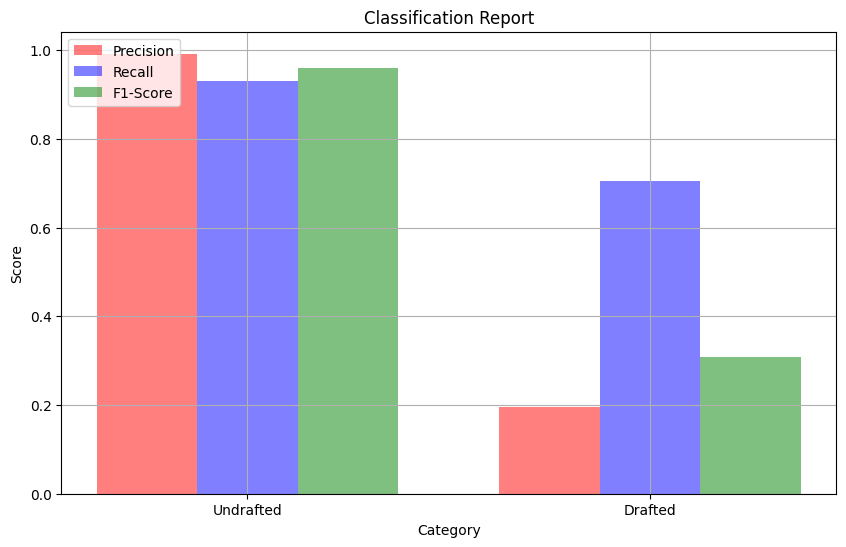

In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'], loc='upper left')
plt.grid()
plt.show()

**Model 5**
<br>
<br>
<br>
<br>
**information in readme**

In [ ]:
#Query to get data for the model
query = """
SELECT conf, GP, mp, pts, Ortg, usg, TS_per, FTM, FTA, twoPA, twoPM, TPM, TPA, drtg, bpm, oreb, dreb, ast, stl, blk, drafted
FROM players
"""
results5 = spark.sql(query)
results5.show()

+----+---+-------+-------+-----+----+------+---+---+-----+-----+---+---+-------+---------+------+------+------+------+------+-------+
|conf| GP|     mp|    pts| Ortg| usg|TS_per|FTM|FTA|twoPA|twoPM|TPM|TPA|   drtg|      bpm|  oreb|  dreb|   ast|   stl|   blk|drafted|
+----+---+-------+-------+-----+----+------+---+---+-----+-----+---+---+-------+---------+------+------+------+------+------+-------+
|  SB| 26|14.5769| 3.8846| 97.3|16.6| 44.43| 10| 14|   68|   26| 13| 39|108.321| -4.99514|0.1923|0.6154|1.1923|0.3462|0.0385|      0|
| WAC| 34|24.5294| 5.9412|108.3|14.9| 54.48| 30| 45|  113|   56| 20| 51|105.078| 0.593024|0.6765|1.2647|1.8235|0.4118|0.2353|      0|
|  BE| 27|33.1852|12.1852| 96.2|21.8| 47.98| 45| 67|  157|   67| 50|154|107.556|0.0031609|0.6296|2.3333| 1.963|0.4815|   0.0|      0|
| WCC| 30|17.9667| 4.9333| 97.7|16.0| 53.69| 14| 27|   63|   25| 28| 62|108.858|-0.977798|   0.7|1.4333|   1.1|0.5667|0.1333|      0|
|  BW| 33|22.9091| 7.5758| 96.5|22.0| 54.31| 64|114|  176|   9

In [ ]:
df5 = results5.toPandas()
df5.head()

,conf,GP,mp,pts,Ortg,usg,TS_per,FTM,FTA,twoPA,...,TPM,TPA,drtg,bpm,oreb,dreb,ast,stl,blk,drafted
0,SB,26,14.5769,3.8846,97.3,16.6,44.43,10,14,68,...,13,39,108.321,-4.995140,0.1923,0.6154,1.1923,0.3462,0.0385,0
1,WAC,34,24.5294,5.9412,108.3,14.9,54.48,30,45,113,...,20,51,105.078,0.593024,0.6765,1.2647,1.8235,0.4118,0.2353,0
2,BE,27,33.1852,12.1852,96.2,21.8,47.98,45,67,157,...,50,154,107.556,0.003161,0.6296,2.3333,1.9630,0.4815,0.0000,0
3,WCC,30,17.9667,4.9333,97.7,16.0,53.69,14,27,63,...,28,62,108.858,-0.977798,0.7000,1.4333,1.1000,0.5667,0.1333,0
4,BW,33,22.9091,7.5758,96.5,22.0,54.31,64,114,176,...,0,0,101.052,-1.836060,1.4242,3.3030,0.8485,0.4545,0.3333,0


In [ ]:
dummies5 = pd.get_dummies(df5, dtype=int)
dummies5.head()

,GP,mp,pts,Ortg,usg,TS_per,FTM,FTA,twoPA,twoPM,...,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,conf_ind
0,26,14.5769,3.8846,97.3,16.6,44.43,10,14,68,26,...,0,1,0,0,0,0,0,0,0,0
1,34,24.5294,5.9412,108.3,14.9,54.48,30,45,113,56,...,0,0,0,0,0,0,0,1,0,0
2,27,33.1852,12.1852,96.2,21.8,47.98,45,67,157,67,...,0,0,0,0,0,0,0,0,0,0
3,30,17.9667,4.9333,97.7,16.0,53.69,14,27,63,25,...,0,0,0,0,0,0,0,0,1,0
4,33,22.9091,7.5758,96.5,22.0,54.31,64,114,176,93,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = dummies5["drafted"]
X = dummies5.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 20

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="tanh"))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                1680      
                                                                 
 dense_12 (Dense)            (None, 20)                620       
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2321 (9.07 KB)
Trainable params: 2321 (9.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
import numpy as np
from sklearn.utils import class_weight
# Calculate the weights for each class so that we can balance the data
class_weights = {0: 1,
                1: 50}

In [ ]:
fit_model = nn5.fit(X_train_scaled, y_train, epochs=200, class_weight=class_weights)

Epoch 1/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.6719 - accuracy: 0.8224
Epoch 2/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5570 - accuracy: 0.8480
Epoch 3/200
1423/1423 [==============================] - 4s 3ms/step - loss: 0.5340 - accuracy: 0.8574
Epoch 4/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5100 - accuracy: 0.8609
Epoch 5/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.4970 - accuracy: 0.8682
Epoch 6/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.4829 - accuracy: 0.8680
Epoch 7/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.4685 - accuracy: 0.8715
Epoch 8/200
1423/1423 [==============================] - 4s 3ms/step - loss: 0.4589 - accuracy: 0.8739
Epoch 9/200
1423/1423 [==============================] - 3s 2ms/step - loss: 0.4464 - accuracy: 0.8764
Epoch 10/200
1423/1423 [==============================] - 3s 2ms/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

475/475 - 1s - loss: 0.2725 - accuracy: 0.9459 - 1s/epoch - 3ms/step
Loss: 0.27248629927635193, Accuracy: 0.9459049701690674


In [ ]:
predictions = nn5.predict(X_test_scaled)
from sklearn.metrics import classification_report
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

475/475 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

   Undrafted       0.99      0.95      0.97     14818
     Drafted       0.26      0.68      0.37       359

    accuracy                           0.95     15177
   macro avg       0.62      0.82      0.67     15177
weighted avg       0.97      0.95      0.96     15177



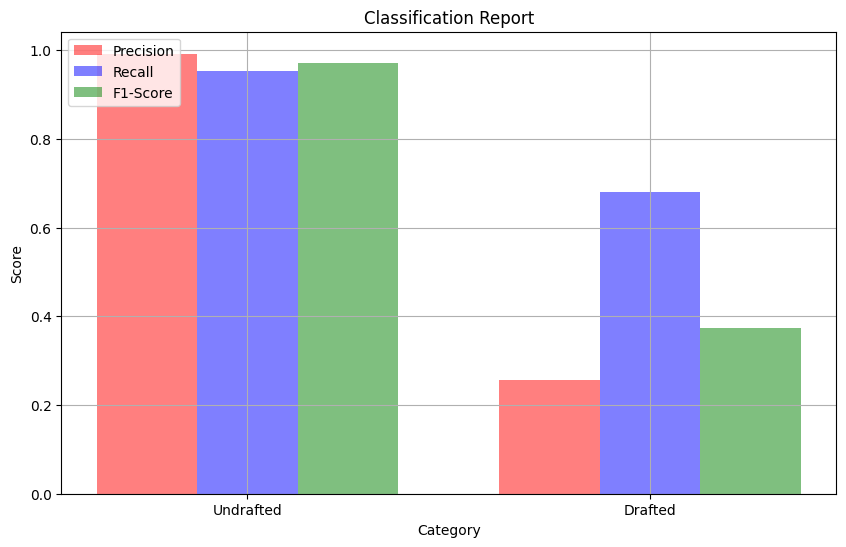

In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'], loc='upper left')
plt.grid()
plt.show()

Model 6

In [ ]:
#Query to get data for the model
query = """
SELECT  conf, MIN_per, pts, eFG, TS_per, FTA, twoPA, TPA, TPM, oreb, dreb, AST_per, TO_per, stl, blk, drafted
FROM players
"""
results = spark.sql(query)
results.show()

In [ ]:
#Converting spark query to pandas dataframe
df1 = results.toPandas()
df1.head()

In [ ]:
#Importing whats needed for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df1, dtype=int)
dummies.head()

In [ ]:
# Split our preprocessed data into our features and target arrays
y = dummies["drafted"]
X = dummies.drop(columns=["drafted"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are your data
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_resampled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
        input_dim=input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the resampled data
fit_model = nn.fit(X_resampled, y_resampled, epochs=100)

# Evaluate your model
predictions = nn.predict(X_test_scaled)
target_names = ["Undrafted", "Drafted"]
predictions = [round(i[0]) for i in predictions]
print(classification_report(y_test, predictions, target_names=target_names))
report6 = classification_report(y_test, predictions, target_names=target_names, output_dict=True)

In [ ]:
report6 = classification_report(y_test, predictions, target_names=target_names, output_dict=True)


In [ ]:
# Used this website to find code to turn a classification report into a graph
# https://medium.com/@Doug-Creates/plotting-scikit-learn-classification-report-for-analysis-0229447fe232
import matplotlib.pyplot as plt
# Plotting the classification report
fig, ax = plt.subplots(figsize=(10, 6))

# Categories for the classification
categories = list(report6.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report6[category]['precision'] for category in categories]
recall = [report6[category]['recall'] for category in categories]
f1_score = [report6[category]['f1-score'] for category in categories]


# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)

# Adding the legend and showing the plot
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'], loc='upper left')
plt.grid()
plt.show()